# Final Exercice: The Rumos Bank 

The Rumos Bank is a bank that has been losing a lot of money due to the number of loans it provides that are not repaid within the due date.

    - For each customer who is estimated to not pay on time but ends up paying, the bank incurs a cost of 1000 euros.

    - For each customer who is predicted to be a good payer but ends up not paying on time, the bank incurs a cost of 3000 euros.


Build a model that successfully detects in advance the customers who are bad payers.


Dataset: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Variáveis disponíveis:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

Based on the given information, we can define that:

    True positive - Bad payers are correctly identified.
    True negative - Good payers are correctly identified.
    False positive - A good payer is identified as a bad payer.
    False negative - A bad payer is identified as a good payer.

In [80]:
root_path = 'C:\\data\\'

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

seed = 42

In [82]:
df = pd.read_csv(root_path + 'lending_data.csv')

In [83]:
df.shape

(30000, 25)

In [84]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [85]:
df.ID.nunique()

30000

#### 1. 

    - There are 24 features in the dataset.
    - There are 30000 clients.

Are there any missing values?

In [86]:
df.isnull().values.any()

False

In [87]:
df.groupby('default.payment.next.month')['default.payment.next.month'].count()

default.payment.next.month
0    23364
1     6636
Name: default.payment.next.month, dtype: int64

The dataset is highly unbalanced.

 - 23,364 were good payers. 6,636 were bad payers.

In [88]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

All the features are numeric.

Let's remover client ID:

In [89]:
df = df.drop('ID', axis = 1)

Split into train and test:

In [90]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

In [91]:
X_train = train_set.drop(['default.payment.next.month'], axis = 'columns')
y_train = train_set['default.payment.next.month']

X_test = test_set.drop(['default.payment.next.month'], axis = 1)
y_test = test_set['default.payment.next.month']

Normalize:

In [92]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train1 = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train, columns = features_names)

X_test1 = scaler.transform(X_test)
X_test1 = pd.DataFrame(X_test, columns = features_names)

Define the baseline, without any model:

$$totalCost = 1000∗FP+3000∗FN$$

In [115]:
y_preds_all_bad = np.ones(y_test.shape) 

In [116]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 1313
Number of False Negatives: 0
Number of False Positives: 4687


In [117]:
print('Total Cost:', fp*1000)

Total Cost: 4687000


In [118]:
accuracy_score(y_test, y_preds_all_bad)

0.21883333333333332

If all customers were considered bad payers, the bank would incur a cost of 4,687,000 Euros.

In [119]:
y_preds_all_good = np.zeros(y_test.shape) 

tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 4687
Number of True Positives: 0
Number of False Negatives: 1313
Number of False Positives: 0


In [120]:
print('Total Cost:', fn*3000)

Total Cost: 3939000


In [121]:
accuracy_score(y_test, y_preds_all_good)

0.7811666666666667

If all customers were considered good payers, the bank would incur a cost of 3,939,000 Euros.

In [177]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp
    

In [178]:
def min_cost_threshold(y_test, y_preds):
    costs = {}
    for threshold in np.arange(0, 1.1, 0.1):
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold)
    min_threshold = min(costs, key=costs.get)
    return costs[min_threshold], min_threshold
    

#### Logistic Regression

In [179]:
import mlflow
from pathlib import Path

# Define the path where MLflow will store tracking data
# This is the directory where all the experiment data will be saved
uri = Path('C:\\Users\\polin\\Downloads\\projecto_final_OML\\projecto_final\\rumos_bank\\mlruns\\')

# Create the directory if it doesn't exist
uri.mkdir(parents=True, exist_ok=True)

# Convert the path to a URI
uri_as_uri = uri.as_uri()

# Set the MLflow tracking URI
#This line sets the tracking URI for MLflow. It tells MLflow where to store all the tracking data for experiments and runs. In this case, the data will be stored in the specified local directory.
mlflow.set_tracking_uri(uri_as_uri)


In [180]:
# Define MLflow Experiment for Logistic Regression
mlflow.set_experiment("Logistic_Regression_Experiment")

<Experiment: artifact_location='file:///C:/Users/polin/Downloads/projecto_final_OML/projecto_final/rumos_bank/mlruns/953718695011782941', creation_time=1717766048573, experiment_id='953718695011782941', last_update_time=1717766048573, lifecycle_stage='active', name='Logistic_Regression_Experiment', tags={}>

In [181]:
mlflow.end_run()

In [182]:

SEED = 42

# Concatenate X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)
train_dataset = mlflow.data.from_pandas(train_data, targets='default.payment.next.month', name="Rumos Bank Train Dataset")
mlflow.log_input(train_dataset, context="train")

# Concatenate X_test and y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_dataset = mlflow.data.from_pandas(test_data, targets='default.payment.next.month', name="Rumos Bank Test Dataset")
mlflow.log_input(test_dataset, context="test")

# Log the seed parameter
mlflow.log_param("seed", SEED)




c:\Users\polin\miniconda3\envs\rumos_bank\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\polin\miniconda3\envs\rumos_bank\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data 

42

In [183]:
from sklearn.pipeline import Pipeline

lr_model = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced')

lr_pipeline = Pipeline(
    steps=[
        ("scaler", MinMaxScaler()),
        ("logistic_regression", lr_model)
])



In [184]:
parameters = {'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

c:\Users\polin\miniconda3\envs\rumos_bank\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\polin\miniconda3\envs\rumos_bank\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data 

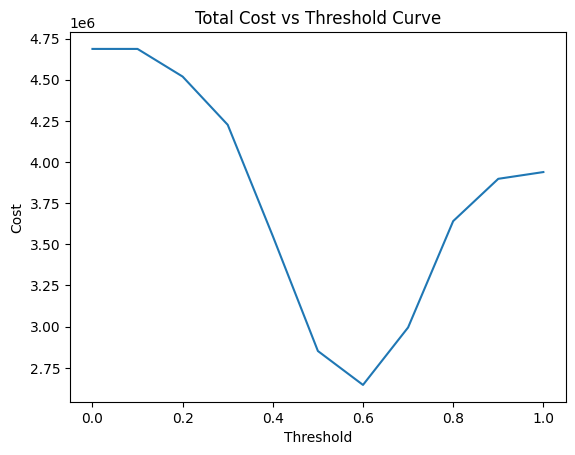

In [185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

with mlflow.start_run(run_name="Logistic Regression Run", nested = True):
    # Train GridSearchCV with the pipeline
    clf_lr = GridSearchCV(lr_pipeline, parameters, cv=5)
    clf_lr.fit(X_train, y_train)
    
    # Predict probabilities for test data
    y_probs = clf_lr.predict_proba(X_test)[:, 1]
    
    # Evaluate logistic regression model
    score = clf_lr.score(X_test, y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_probs > 0.5).ravel()
    
    # Calculate total cost and minimum cost threshold
    cost, min_threshold = total_cost(y_test, y_probs), min_cost_threshold(y_test, y_probs)
    
    # Log parameters, metrics, and model artifacts with MLflow
    mlflow.log_params(clf_lr.best_params_)
    mlflow.log_metric("accuracy", score)
    mlflow.log_metric("total_cost", cost)
    mlflow.log_metric("min_cost_threshold", min_threshold[0])
    
    
    # Plot total cost vs threshold curve
    thresholds = np.arange(0, 1.1, 0.1)
    costs = [total_cost(y_test, y_probs, threshold) for threshold in thresholds]
    plt.plot(thresholds, costs)
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.title('Total Cost vs Threshold Curve')
    plt.savefig('total_cost_vs_threshold.png')
    mlflow.log_artifact('total_cost_vs_threshold.png')

    # Log the final model
    mlflow.sklearn.log_model(clf_lr.best_estimator_, artifact_path="lr_pipeline", registered_model_name="logistic_regression", input_example=X_train)

In [186]:
params=lr_pipeline.get_params()
mlflow.log_params(params)
params


{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('logistic_regression',
   LogisticRegression(class_weight='balanced', max_iter=500, random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic_regression': LogisticRegression(class_weight='balanced', max_iter=500, random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic_regression__C': 1.0,
 'logistic_regression__class_weight': 'balanced',
 'logistic_regression__dual': False,
 'logistic_regression__fit_intercept': True,
 'logistic_regression__intercept_scaling': 1,
 'logistic_regression__l1_ratio': None,
 'logistic_regression__max_iter': 500,
 'logistic_regression__multi_class': 'auto',
 'logistic_regression__n_jobs': None,
 'logistic_regression__penalty': 'l2',
 'logistic_regression__random_state': 42,
 'logistic_regression__solver': 'lbfgs',
 'logistic_regression__tol': 0.0001,
 'logistic_regression__verbose': 0,
 'logistic_regression__warm_start': False}

In [187]:
mlflow.end_run()
run = mlflow.get_run(RUN_ID)
run.data

<RunData: metrics={}, params={'seed': '42'}, tags={'mlflow.runName': 'Logistic Regression Run',
 'mlflow.source.name': 'c:\\Users\\polin\\miniconda3\\envs\\rumos_bank\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'polin'}>

In [23]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 1.61 s


In [24]:
clf_lr.score(X_test, y_test)

0.6936666666666667

In [25]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [26]:
total_cost(y_test, y_preds, threshold = 0.5)

2852000

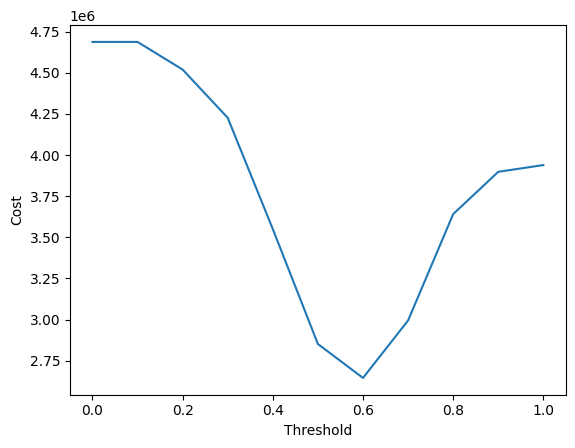

In [27]:
min_cost_threshold(y_test, y_preds)

In [28]:
total_cost(y_test, y_preds, threshold = 0.6)

2646000

The cost is minimized for a threshold of 0.6: 2,646,000 Euros, which is better than the baseline!

#### KNN

In [29]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 53.3 s
Wall time: 9.14 s


KNN is not a suitable method for large datasets! Let's see if it compensates in terms of results:

In [30]:
y_preds = clf_knn.predict_proba(X_test)[:,1]

clf_knn.score(X_test, y_test)

0.807

In [31]:
total_cost(y_test, y_preds, threshold = 0.5)

2900000

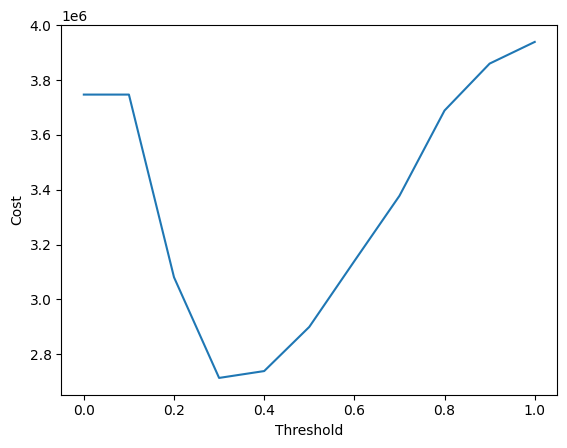

In [32]:
min_cost_threshold(y_test, y_preds)

In [33]:
total_cost(y_test, y_preds, threshold = 0.3)

2714000

Better than baseline but worse than logistic regression.

#### SVM

In [46]:
%%time

svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }

clf_svc = GridSearchCV(svc, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

[LibSVM]CPU times: total: 18.8 s
Wall time: 10min 13s


In [41]:
y_preds = clf_svc.predict_proba(X_test)[:,1]

In [42]:
clf_svc.score(X_test, y_test)

0.7778333333333334

In [43]:
total_cost(y_test, y_preds, threshold = 0.5)

2933000

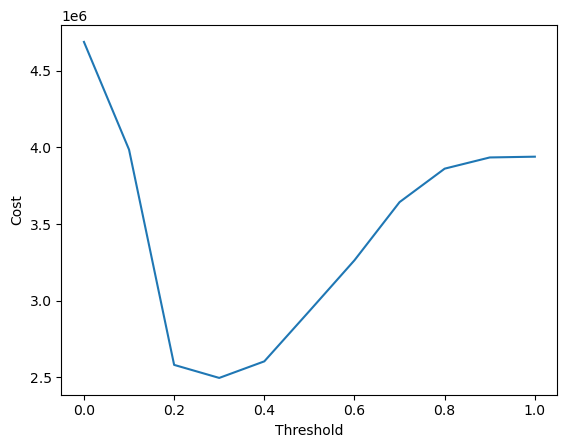

In [44]:
min_cost_threshold(y_test, y_preds)

In [45]:
total_cost(y_test, y_preds, threshold = 0.3)

2497000

Best value so far.

#### Decision Trees

In [35]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'max_depth':[3, 6], 'min_samples_split': [2, 4, 10]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 406 ms
Wall time: 2.89 s


In [36]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [37]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.7608333333333334

In [38]:
total_cost(y_test, y_preds, threshold = 0.5)

2581000

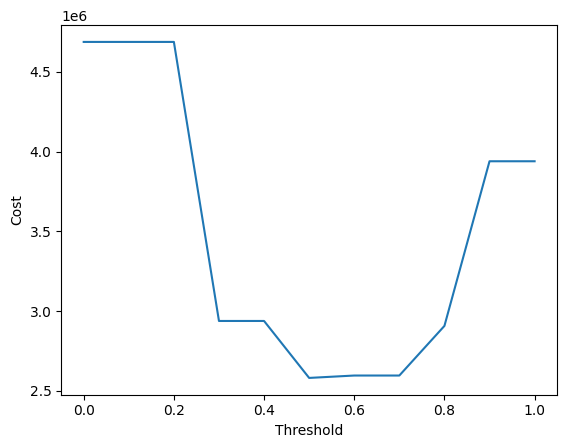

In [39]:
min_cost_threshold(y_test, y_preds)

In [40]:
total_cost(y_test, y_preds, threshold = 0.5)

2581000

SVMs still has the best result.

#### Random Forests

In [42]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

CPU times: total: 12.2 s
Wall time: 1min 53s


In [43]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.817

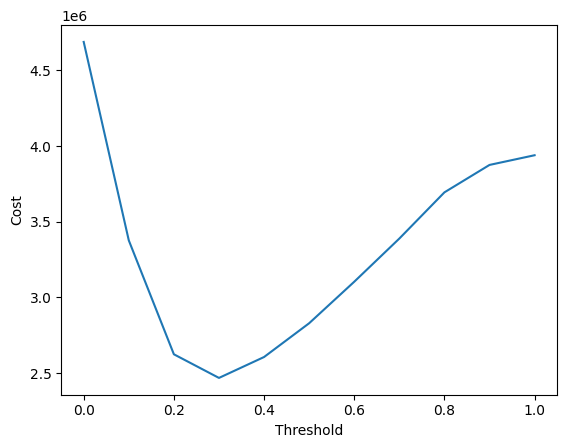

In [44]:
min_cost_threshold(y_test, y_preds)

In [45]:
total_cost(y_test, y_preds, threshold = 0.3)

2469000

Best value so far.

#### Neural Networks

In [ ]:
X_train.shape

In [47]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_mlp = GridSearchCV(mlp, parameters, cv = 5, n_jobs=-1).fit(X_train, y_train)

CPU times: total: 3.05 s
Wall time: 2min 53s


c:\Users\polin\miniconda3\envs\rumos_bank\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [48]:
clf_mlp.best_estimator_

MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.0001,
              max_iter=1000, random_state=42, solver='lbfgs')

In [49]:
clf_mlp.best_score_

0.8169166666666665

In [50]:
y_preds = clf_mlp.predict_proba(X_test)[:,1]

clf_mlp.score(X_test, y_test)


0.8196666666666667

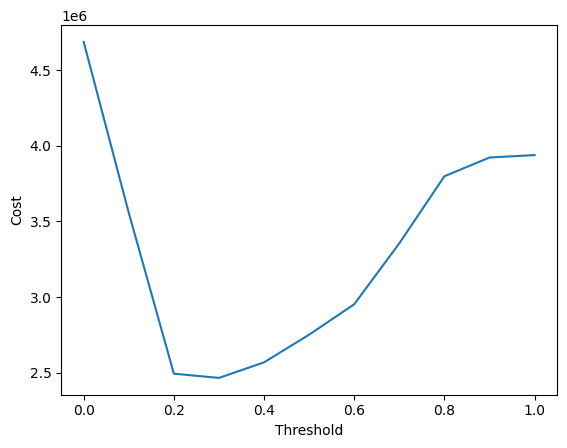

In [51]:
min_cost_threshold(y_test, y_preds)

In [52]:
total_cost(y_test, y_preds, threshold = 0.2)

2494000

Almost same result as random forests.

- The models that led to the best results were neural networks and random forests - 2,467,000 in cost.
- Since I can't determine the feature importance with neural networks, I will choose the random forest model as the final solution. Additionally, training the neural networks took almost twice as long.

#### 4. Most relevant features to determine is the client is a bad payer:

In [53]:
rf = RandomForestClassifier(**clf_rf.best_params_).fit(X_train, y_train)

In [54]:
important_features = pd.DataFrame(data = rf.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
PAY_0,0.097723
AGE,0.066411
BILL_AMT1,0.059880
LIMIT_BAL,0.059466
BILL_AMT2,0.054470
BILL_AMT3,0.051623
PAY_AMT1,0.051268
BILL_AMT6,0.050361
BILL_AMT4,0.050240
BILL_AMT5,0.050093


The variables that most contribute to the model's decision on whether a customer will be a good or bad payer are:

- PAY_0 - Repayment status in September, 2005
- AGE - Age of the customer

#### 5. Cost without any model:

    - The cost the bank would incur without a model, that is, assuming all customers would be good payers, is: 3,939,000 Euros.

#### 6. Cost with our model:

The cost the bank would incur with the model would be: 2,476,000 Euros - It would save almost 1.5 million Euros!